# Session 2: Training a network w/ Tensorflow
<p class='lead'>
Creative Applications of Deep Learning with Google's Tensorflow<br />
Parag K. Mital<br />
Kadenze, Inc.<br />
</p>

<a name="learning-goals"></a>
# Learning Goals

* The basic components of a neural network
* How to use gradient descent to optimize parameters of a neural network
* How to create a neural network for performing regression

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Introduction](#introduction)
- [Gradient Descent](#gradient-descent)
    - [Defining Cost](#defining-cost)
    - [Minimizing Error](#minimizing-error)
    - [Backpropagation](#backpropagation)
    - [Extra details for notebook only](#extra-details-for-notebook-only)
    - [Local Minima/Optima](#local-minimaoptima)
    - [Learning Rate](#learning-rate)
- [Creating a Neural Network](#creating-a-neural-network)
    - [Defining Cost](#defining-cost-1)
    - [Training Parameters](#training-parameters)
    - [Training vs. Testing](#training-vs-testing)
    - [Stochastic and Mini Batch Gradient Descent](#stochastic-and-mini-batch-gradient-descent)
    - [Input's Representation](#inputs-representation)
    - [Over vs. Underfitting](#over-vs-underfitting)
    - [Introducing Nonlinearities / Activation Function](#introducing-nonlinearities--activation-function)
    - [Going Deeper](#going-deeper)
- [Image Inpainting](#image-inpainting)
    - [Description](#description)
    - [Building the Network](#building-the-network)
    - [Training](#training)
- [Homework:](#homework)
- [Reading:](#reading)

<!-- /MarkdownTOC -->

<a name="introduction"></a>
# Introduction

In this session we're going to take everything we've learned about Graphs, Sessions, Operations, and Tensors and use them all to form a neural network.  We're going to learn how we can use data and something called gradient descent to teach the network what the values of the parameters of this network should be.

In the last session, we saw how to normalize a dataset, using the dataset's mean and standard deviation.  While this seemed to reveal some interesting representations of our dataset, it left us with a lot more to explain.  In the case of faces, it really seemed to explain more about the background than the actual faces.  For instance, it wasn't able to describe the differences between different races, gender, expressions, hair style, hair color, or the other many various differences that one might be interested in.

What we're really interested in is letting the computer figure out what representations it needs in order to better describe the data and some objective that we've defined.  That is the fundamental idea behind machine learning: letting the machine learn from the data.  In this session, we're going to start to see how to do that.

Before we get into the details, I'm going to go over some background on gradient descent and the different components of a neural network.  If you're comfortable with all of this, please feel free to skip ahead.

<a name="gradient-descent"></a>
# Gradient Descent

Whenever we create a neural network, we have to define a set of operations.  These operations try to take us from some input to some output.  For instance, the input might be an image, or frame of a video, or text file, or sound file.  The operations of the network are meant to transform this input data into something meaningful that we want the network to learn about.

Initially, all of the parameters of the network are random.  So whatever is being output will also be random.  But let's say we need it to output something specific about the image.  To teach it to do that, we're going to use something called "Gradient Descent".  Simply, Gradient descent is a way of optimizing a set of parameters.

Let's say we have a few images, and know that given a certain image, when I feed it through a network, its parameters should help the final output of the network be able to spit out the word "orange", or "apple", or some appropriate *label* given the image of that object.  The parameters should somehow accentuate the "orangeness" of my image.  It probably will be able to transform an image in away that it ends up having high intensities for images that have the color orange in them, and probably prefer images that have that color in a fairly round arrangement.

Rather than hand crafting all of the possible ways an orange might be manifested, we're going to learn the best way to optimize its objective: separating oranges and apples.  How can we teach a network to learn something like this?

<a name="defining-cost"></a>
## Defining Cost

Well we need to define what "best" means.  In order to do so, we need a measure of the "error".  Let's continue with the two options we've been using: orange, or apple.  I can represent these as 0 and 1 instead.

I'm going to get a few images of oranges, and apples, and one by one, feed them into a network that I've randomly initialized.  I'll then filter the image, by just multiplying every value by some random set of values.  And then I'll just add up all the numbers, and then squash the result in a way that means I'll only ever get 0 or 1.  So I put in an image, and I get out a 0 or 1.  Except, the parameters of my network are totally random, and so my network will only ever spit out random 0s or 1s.  How can I get this random network to know when to spit out a 0 for images of oranges, and a 1 for images of apples?

We do that by saying, if the network predicts a 0 for an orange, then the error is 0.  If the network predicts a 1 for an orange, then the error is 1.  And vice-versa for apples.  If it spits out a 1 for an apple, then the error is 0.  If it spits out a 0 for an apple, then the error is 1.  What we've just done is create a function which describes error in terms of our parameters:

Let's write this another way:

\begin{align}
\text{error} = \text{network}(\text{image}) - \text{true_label}
\end{align}

where

\begin{align}
\text{network}(\text{image}) = \text{predicted_label}
\end{align}

More commonly, we'll see these components represented by the following letters:

\begin{align}
E = f(X) - y
\end{align}

Don't worry about trying to remember this equation.  Just see how it is similar to what we've done with the oranges and apples.  `X` is generally the input to the network, which is fed to some network, or a function $f$, which we know should output some label `y`.  Whatever difference there is between what it should output, y, and what it actually outputs, $f(x)$ is what is different, or error, $E$.


<a name="minimizing-error"></a>
## Minimizing Error

Instead of feeding one image at a time, we're going to feed in many.  Let's say 100.  This way, we can see what our network is doing on average.  If our error at the current network parameters is e.g. 50/100, we're correctly guessing about 50 of the 100 images.

Now for the crucial part.  If we move our network's parameters a tiny bit and see what happens to our error, we can actually use that knowledge to find smaller errors.  Let's say the error went up after we moved our network parameters.  Well then we know we should go back the way we came, and try going the other direction entirely.  If our error went down, then we should just keep changing our parameters in the same direction.  The error provides a "training signal" or a measure of the "loss" of our network.  You'll often hear anyone number of these terms to describe the same thing, "Error", "Cost", "Loss", or "Training Signal'.  That's pretty much gradient descent in a nutshell.  Of course we've made a lot of assumptions in assuming our function is continuous and differentiable.  But we're not going to worry about that, and if you don't know what that means, don't worry about it.

<a name="backpropagation"></a>
## Backpropagation

To summarize, Gradient descent is a simple but very powerful method for finding smaller measures of error by following the negative direction of its gradient.  The gradient is just saying, how does the error change at the current set of parameters?

One thing I didn't mention was how we figure out what the gradient is.  In order to do that, we use something called backpropagation.  When we pass as input something to a network, it's doing what's called forward propagation.  We're sending an input and multiplying it by every weight to an expected output.  Whatever differences that output has with the output we wanted it to have, gets *backpropagated* to every single parameter in our network.  Basically, backprop is a very effective way to find the gradient by simply multiplying many partial derivatives together.  It uses something called the chain rule to find the gradient of the error with respect to every single parameter in a network, and follows this error from the output of the network, all the way back to the input.

While the details won't be necessary for this course, we will come back to it in later sessions as we learn more about how we can use both backprop and forward prop to help us understand the inner workings of deep neural networks.

If you are interested in knowing more details about backprop, I highly recommend both Michael Nielsen's online Deep Learning book:

http://neuralnetworksanddeeplearning.com/

and Yoshua Bengio's online book:

http://www.deeplearningbook.org/

<a name="extra-details-for-notebook-only"></a>
## Extra details for notebook only

To think about this another way, the definition of a linear function is written like so:

\begin{align}
y = mx + b
\end{align}

The slope, or gradient of this function is $m$ everywhere.  It's describing how the function changes with different network parameters.  If I follow the negative value of $m$, then I'm going down the slope, towards smaller values.

But not all functions are linear.  Let's say the error was something like a parabola:

\begin{align}
y(x) = x^2
\end{align}

That just says, there is a function y, which takes one parameter, $x$, and this function just takes the value of $x$ and multiplies it by itself, or put another way, it outputs $x^2$.  Let's start at the minimum.  At $x = 0$, our function $y(0) = 0$.  Let's try and move a random amount, and say we end up at $1$.  So at $x = 1$, we know that our function went up from $y(0) = 0$ to $y(1) = 1$.  The change in $y = 1$.  The change in $x = 1$.  So our slope is:

\begin{align}
\frac{\text{change in } y}{\text{change in } x} = \frac{(y(1) - y(0)}{(1 - 0)} = \frac{1}{1} = 1
\end{align}

If we go in the negative direction of this, $x = x - 1$, we get back to 0, our minimum value.

If you try this process for any value and you'll see that if you keep going towards the negative slope, you go towards smaller values.

You might also see this process described like so:

\begin{align}
\theta = \theta - \eta \cdot \nabla_\theta J( \theta)
\end{align}

That's just saying the same thing really.  We're going to update our parameters, commonly referred to by $\theta$, by finding the gradient, $\nabla$ with respect to parameters $\theta$, $\nabla_\theta$, of our error, $J$, and moving down the negative direction of it: $- \eta \cdot \nabla_\theta J( \theta)$.  The $\eta$ is just a parameter also known as the learning rate, and it describes how far along this gradient we should travel, and we'll typically set this value from anywhere between 0.01 to 0.00001.

<a name="local-minimaoptima"></a>
## Local Minima/Optima

Before we start, we're going to need some library imports:

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

One pitfall of gradient descent is that some functions contain "minima", which is another way of saying a trough, or a concave point, or put another way, a dip in a function.

Let's say, purely for illustration, that our cost function looked like:

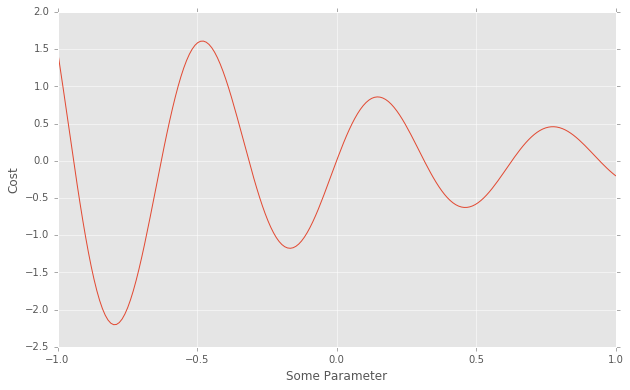

In [2]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

We'll never really ever be able to see our entire cost function like this.  If we were able to, we'd know exactly what parameter we should use.  So we're just imagining that as any parameters in our network change, this is how cost would change.  Since we know the value of the cost everywhere, we can easily describe the gradient using `np.diff`, which will just measure the difference between every value.  That's a good approximation of the gradient for this illustration at least.

In [4]:
gradient = np.diff(cost)
gradient.shape

(199,)

If we follow the negative gradient of this function given some randomly intialized parameter and a learning rate:

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


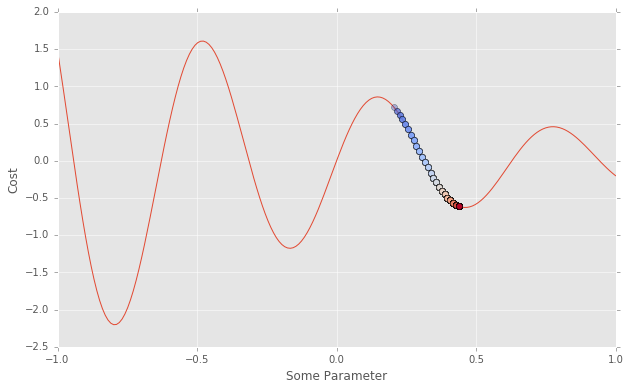

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate * gradient[init_p]
    ax.plot(x[init_p], cost[init_p], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

What this would mean is depending on where our random initialization of weights began, our final cost might end up being somewhere around -0.5.  This is a local minima.  It is, based on its surroundings, a minima.  But it is not the global minima.  In fact there are a few other possible places the network could have ended up, if our initialization led us to another point first, meaning our final cost would have been different.

This illustration is just for a single parameter... but our networks will often have millions of parameters... I'll illustrate the same idea with just two parameters to give you a sense of how quickly the problem becomes very difficult.

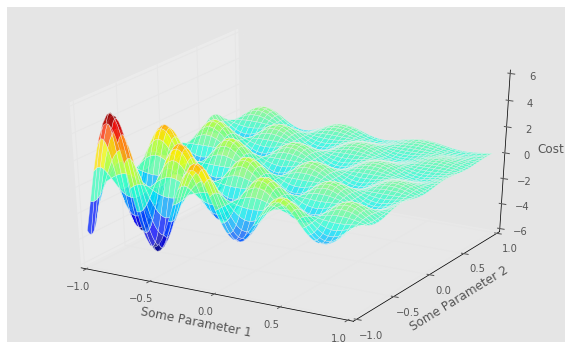

In [6]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')
# ax.axis('off')

It turns out that in practice, as the number of your parameters grows, say to a million, then finding a local minima will more often than not turn out to be very good minima.  That's good news for deep networks as we'll often work with that many parameters.

<a name="learning-rate"></a>
## Learning Rate

Another aspect of learning what our parameters should be, is how far along the gradient we should move our parameters?  That is also known as `learning_rate`.  Let's see what happens for different values of our learning rate:

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


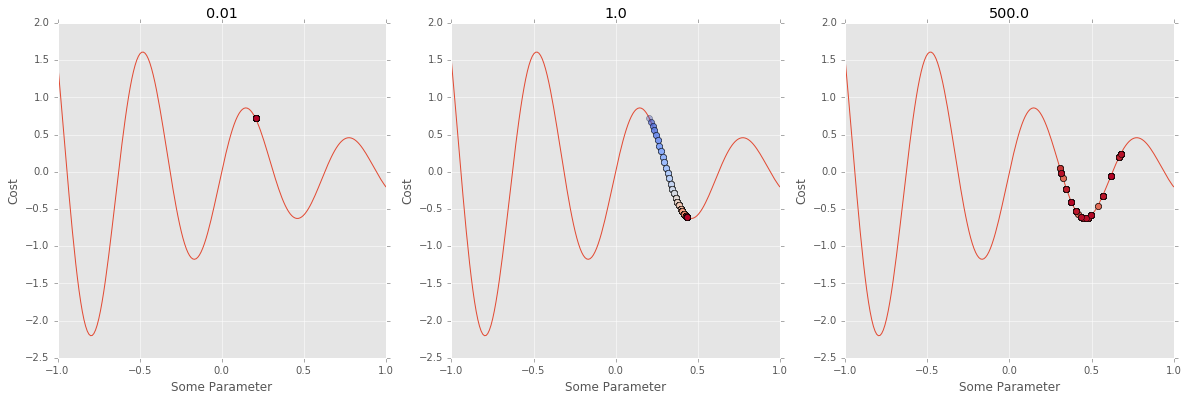

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[init_p]
        ax.plot(x[init_p], cost[init_p], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

In the first case, our learning rate was way too small.  It looks like we didn't manage to get any better cost than where we started!  In the second case, just right.  In the third case, our learning rate was too large.  Meaning, we overshot our minima, and moved past it.  So our cost has the effect of going up and down, instead of just going down like in the second case.

We'll learn more tricks for changing this landscape to be a bit more concave, reducing the number of local minima by regularizing the landscape through many different extensions to this same basic idea of following the negative slope of our gradient.  Before we can get into them we'll need to learn how to create a neural network.

<a name="creating-a-neural-network"></a>
# Creating a Neural Network

Let's try a simple example network.  We're going try to find a mapping of an input `X` to an output `y`, just like in our example of mapping an input image to either a 0 or 1.

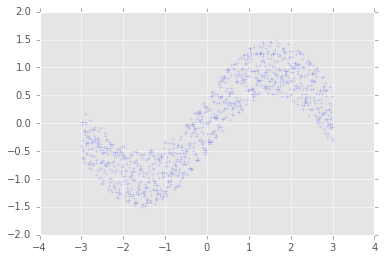

In [9]:
# Let's create some toy data

# We are going to say that we have seen 1000 values of some underlying representation that we aim to discover
n_observations = 1000

# Instead of having an image as our input, we're going to have values from -3 to 3.  This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some noise to the function, and try to have our algorithm discover the underlying cause of the data, which is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

So now we can see that there is a sine wave looking thing but it's really noisy.  We want to train a network to say, given any value on the $x$ axis, tell me what the value should be on the $y$ axis.  That is the fundamental idea of regression.  Predicting some continuous output value given some continuous input value.

<a name="defining-cost-1"></a>
## Defining Cost

We're going to use tensorflow to train our first network:

In [10]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

Now for parameters of our network.  We're going to transform our x values, just like we did with an image and filtering it.  In order to do that, we're going to multiply the value of x by some unknown value.  Pretty simple.  So what that lets us do is scale the value coming in.  We'll also allow for a simple shift by adding another number.  That lets us move the range of values to any new position.

But we need an initial value for our parameters.  For that, we're going to use values close to 0 using a gaussian function:

(array([   5.,   33.,   97.,  174.,  237.,  192.,  155.,   80.,   23.,    4.]),
 array([-3.15677094, -2.52658648, -1.89640203, -1.26621757, -0.63603311,
        -0.00584865,  0.62433581,  1.25452027,  1.88470473,  2.51488919,
         3.14507365]),
 <a list of 10 Patch objects>)

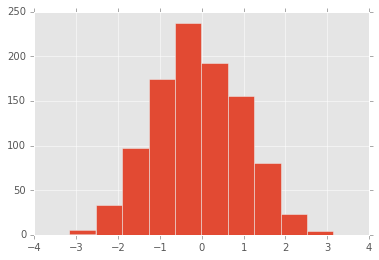

In [11]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

In order to do that, we can use the tensorflow `random_normal` function.  If we ask for 1000 values and then plot a histogram of the values, we can see that the values are centered around 0 and are mostly between -3 and 3.  For neural networks, we will usually want the values to start off much closer to 0.  To do that, we can control the standard deviation like so:

(array([   8.,   31.,   63.,  127.,  218.,  225.,  173.,  107.,   37.,   11.]),
 array([-0.31232738, -0.25149117, -0.19065496, -0.12981875, -0.06898254,
        -0.00814633,  0.05268988,  0.11352609,  0.1743623 ,  0.23519851,
         0.29603472]),
 <a list of 10 Patch objects>)

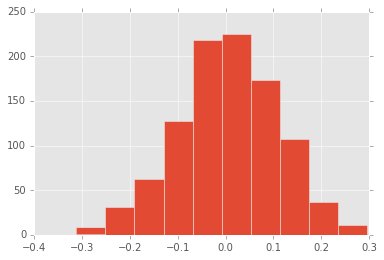

In [12]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [13]:
# To create the variables, we'll use tf.Variable, which unlike a placeholder, does not require us to define the value at the start of a run/eval.  It does need an initial value, which we'll give right now using the function tf.random_normal.  We could also pass an initializer, which is simply a function which will call the same function.  We'll see how that works a bit later.  In any case, the random_normal function just says, give me a random value from the "normal" curve.  We pass that value to a tf.Variable which creates a tensor object.
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B

We're going to use gradient descent to learn what the best value of `W` and `b` is.  In order to do that, we need to know how to measure what the `best` is.  Let's think about that for a moment.  What is it we're trying to do?  We're trying to transform a value coming into the network, `x`, which ranges from values of -3 to 3, to match a known value, `Y`, which should be a sine wave which ranges from -1 to 1.  So any value into the network should make it seem like the network *represents* a sine wave.  Well we know what a sine wave should be.  We can just use python to calculate it for us.  We just need a function that measures distance:

In [14]:
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [15]:
# and now we can take the output of our network and our known target value
# and ask for the distance between them
cost = distance(Y_pred, tf.sin(X))

This function is just saying, give me the distance from the predicted value to the assumed underlying sine wave value.  But let's say this was some natural occuring data in the world.  Or a more complex function, like an image of oranges or apples.  We don't know what the function is that determines whether we perceive an image as an apple or orange.

In [16]:
# cost = distance(Y_pred, ?)

But we do have a limited set of data that says what a given input *should* output.  That means we can still learn what the function might be based on the data.

So instead of our previous cost function, we'd have:

In [17]:
cost = distance(Y_pred, Y)

where `Y` is the *true* Y value.

Now it doesn't matter what the function is.  Our cost will measure the difference to the value we have for the input, and try to find the underlying function.  Lastly, we need to sum over every possible observation our network is fed as input.  That's because we don't give our network 1 `x` value at a time, but generally will give it 50-100 or more examples at a time.

In [19]:
cost = tf.reduce_mean(distance(Y_pred, Y))

<a name="training-parameters"></a>
## Training Parameters

Let's see how we can learn the parameters of this simple network using a tensorflow optimizer.

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

<TODO: Describe Train/Test sets, use test set to visualize rest of number line>

We tell the optimizer to minimize our `cost` variable which measures the distance between the prediction and actual `Y` value.  The optimizer knows how to calculate the gradient and follow it in the negative direction to find the smallest value, and handles updating all variables!

We now just need to iteratively run the optimizer, just like we would run/eval any other part of our tensorflow graph.

/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


1.02398
0.947662
0.874561
0.803784
0.737117
0.674727
0.618797
0.571222
0.533688
0.503904
0.481455
0.464174
0.451612
0.44257
0.435802
0.430376
0.426155
0.423173
0.421362
0.420257
0.419371
0.418686
0.418208
0.417888
0.417597
0.417354
0.417178
0.41708
0.416986
0.416894
0.416823
0.416779
0.416739
0.4167
0.41667
0.416645
0.416626


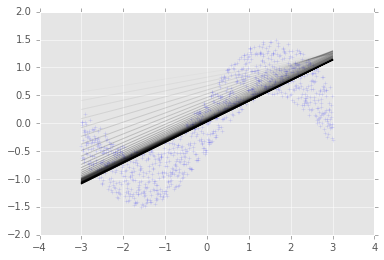

In [23]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.initialize_all_variables())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

After running the code, we should see our original noisy data.  We call that the training data since it is training the network.  And we see the output of the network as a solid black line.

Now you might be thinking, wait, that looks like nothing like a sine wave... I mean it has got the general trend of the line I guess.  But it doesn't curve at all!  We're going to get into why that is in a moment.

But first, we're going to have to learn a bit more about the different between training and testing networks.

<a name="training-vs-testing"></a>
## Training vs. Testing

<TODO:>

<a name="stochastic-and-mini-batch-gradient-descent"></a>
## Stochastic and Mini Batch Gradient Descent

Now remember when I said our cost manifold would have many local minima, and that we'd learn some tricks to help us find the best one?  Well now we're ready to talk about two ways of helping with that.  One is using what are called mini-batches.  This is useful for a number of reasons.  First, it is generally impractical to look at an entire dataset.  You might have millions of images which you couldn't ever try loading all at once into a network.  Instead you would look at some random subset of them.  Second, we avoid trying to generalize our entire dataset, allowing us to navigate through more fine grained terrain.  In order to use mini batches, we simply iterate through our entire dataset, `batch_size` at a time:

In [24]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


It turns out that this is not the best idea, because we're always looking at the same order of our dataset.  Neural networks love order.  They will pick up on any order you give it and use that to its advantage.  But the order of the data is entirely irrelevant to our problem.  In some cases, it may turn out to be exactly what we want to do.  For instance, if we want to learn about how something changes over time, like audio, or letters or words in a sequence which form sentences.  Then we will have to make sure we're sending data in a certain order.  But for now, we really want to avoid using any order.

So we'll have to randomly permute the indexes of our dataset like so:

In [25]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs) // batch_size
print('# of batches:', n_batches)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

# of batches: 10
[57 65 29 69 59 80 95 46 15 13]
[68 87  6 52 23  8 11 81 12 75]
[76 70 83 37 60 35 18 64 91  1]
[10 48 22 66 54 14 97 55 32 49]
[31 90 58 45 50 94  5 88 36 26]
[ 4  3 30 99 74 47  2 61 78 28]
[98 39 89  7 77 25  0 53 24 19]
[82 67 34 33 93 51 21 16 86 38]
[63 79 43 44 62 84 40 27 17 96]
[85 71 56 72 20 41 92 73  9 42]


What we've done above is look at a range of 100 possible indexes by chunking them into `batch_size` at a time.  But we've also randomized the order we've looked at them so that we aren't prioritizing learning one part of a dataset over another.

We can implement this into our previous code like so:

1.02853
0.953084
0.880835
0.81102
0.744541
0.681685
0.624669
0.576259
0.537369
0.506836
0.483705
0.465859
0.452779
0.443433
0.436455
0.430904
0.426559
0.423439
0.421504
0.420369
0.419467
0.418763
0.418248
0.417923
0.41763
0.417379
0.41719
0.417089
0.416996
0.416903
0.416829
0.416784
0.416743
0.416704
0.416673
0.416647
0.416628
0.416617
0.416613
0.41661
0.416609
0.416609
0.416609
0.416609
0.416609
0.416609
0.416609
0.416609
0.416609
0.416609


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


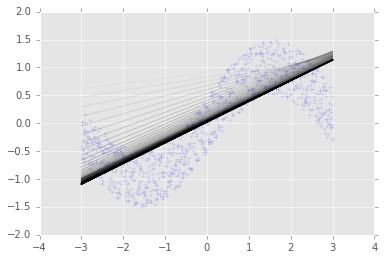

In [26]:
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or tf.constant_intitializer,
    # then this would have set `W` and `b` to their initial values.
    sess.run(tf.initialize_all_variables())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
fig.show()
plt.draw()

The resulting process is also know as Mini-Batch Gradient Descent, since we are taking smaller batches of our data and performing gradient descent.  Further, it is Stochastic, meaning the order of the data presented is randomized, and is also commonly referred to as Stochastic Gradient Descent.  When the two ideas are combined, we have the best of both worlds: the mini batch part which allows us to get more stable updates; and the stochastic part which allows us to move to different parts of our cost's manifold entirely.  I'll just use Gradient Descent as we'll always want it to be in batches, and to be the stochastic kind.

Let's stick all of the code necessary for training into a function so we don't have to type it out again:

In [45]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    sess = tf.Session()
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.initialize_all_variables())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
    fig.show()
    plt.draw()
    return sess

To get closer to a sine wave, we're going to have to be able to do more than simply scale our input with a multiplication!  What if we had a lot more parameters?  What if we have 10 different multiplications of the input?  What does your intuition tell you?  How are 10 more multiplications combined?  1000?  A million?

<QUIZ>

Would we be able to find a good representation then?  Let's try and see how we might do that:

2.60181
2.97704
2.81495
2.84164
1.82592
2.39304
3.05643
3.56074
3.36641
3.32348


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


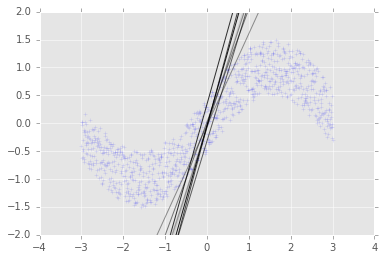

In [28]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

First, the training takes a lot longer!  That's because our network is much larger.  By adding 100 neurons, we've added 100 more multiplications, and 100 more additions for every observation.  Since we have 10000 observations, that's $(100 + 100) * 10000$ more computations just for computing the output, or 100 million more computations.  But that's not all.  We also need to compute the gradients of every parameter!  Having all of these extra parameters makes it much harder to find the best solution.  So as our network expands, the amount of memory and computation will grow very fast, and training becomes more difficult.

Despite increasing everything about our network, looking at the cost, we're not doing much better!  Why is that?  Well, we've added a lot more multiplications.  But it hasn't changed the fact that our function is still just a linear function.  Multiplying a millions times wouldn't help but instead just make it harder to find the same solution we found with far less parameters.  But also, the cost is going up and down, instead of just down.  That's a good sign that we should probably reduce the learning rate.

<a name="inputs-representation"></a>
## Input's Representation

In order to get more complexity, we could consider changing our input's representation.  For instance, if you are working with sound, it may not be the best idea to think about representing the sound as a signal, and instead you might want to explore using something like the discrete fourier transform.  Or if you're working with text, there may be other representations that will allow you to learn more useful features of your data such as word histograms.  There may be other possibilities depending on your application.

<a name="over-vs-underfitting"></a>
## Over vs. Underfitting

One technique for representing curved data like a sine wave is to consider the different polynomials of your input.

0.661362
0.417231
0.416617
0.416612
0.41661
0.416612
0.416613
0.416612
0.416614
0.41661


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


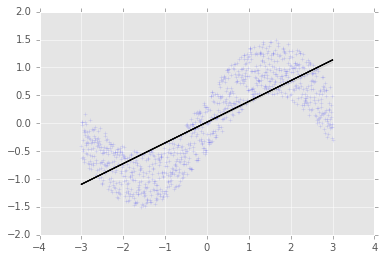

In [30]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 2):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

If we use the 0th and 1st expansion, that is $x^0$, which just equals 1, and $x^1$.  So $1 * W_1 + x * W_2$.  That's exactly the same as what we've just done.  It starts to get interesting once we add more powers:

0.682542
0.469119
0.391192
0.385727
0.477969
0.569223
0.571666
0.58088
0.512756
0.598303


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


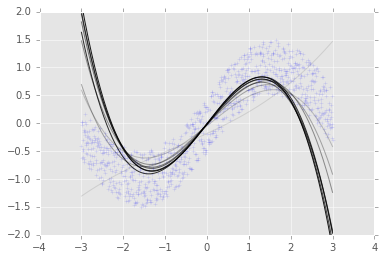

In [31]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

But we really don't want to add *too many* powers.  If we add just 1 more power:

1.85134
3.22822
0.576333
2.47782
3.4825
4.63225
2.46679
3.89522
3.71509
2.57549


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


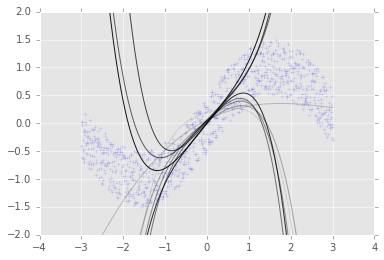

In [32]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 5):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

The whole thing is completely off.  In general, a polynomial expansion is hardly ever useful as it requires us to know what the underlying function is, meaning, what order polynomial is it?

<a name="introducing-nonlinearities--activation-function"></a>
## Introducing Nonlinearities / Activation Function

How else can we get our line to express the curves in our data?  What we'll explore instead is what happens when you add a non-linearity, which you might also hear be called an activation function.  That is a really essential ingredient to any deep network.  Practically every complex deep learning algorithm performs a series of linear, followed by nonlinear operations.  By stacking sets of these, the complexity and power of expression grows far greater than any linear equation could.

We'll typically make use of one of three non-linearities for the rest of this course:

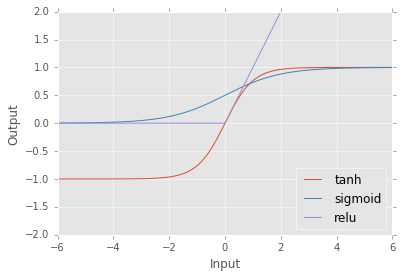

In [33]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

What each of these curves demonstrates is how instead of just multiplying an input by a number, creating another line, we *non*-linearly multiply the input value.  That just means we will multiply our input by a different value depending on what the input value is.  This allows us to express very complex ideas.  If we do this enough times, we can express anything.  Let's see how we can do this

1.2712
0.284277
0.272278
0.268939
0.267724
0.267109
0.266689
0.266358
0.266113
0.265847


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Inputer Bias: 0.00623456


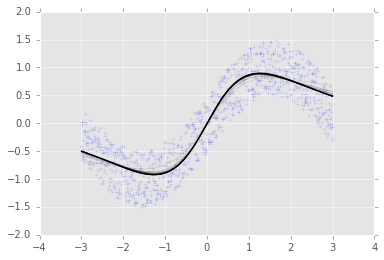

In [52]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')
ib = tf.Variable(0.0, name='ib')

# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X + ib, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

# And retrain w/ our new Y_pred
with train(X, Y, Y_pred) as sess:
    print('Inputer Bias:', sess.run(ib))

<TODO: Graphic of fully connected network, matrix>

It turns out that multiplying our input by a matrix, adding a bias, and then applying a non-linearity is something we'll need to do a lot.  It's often called a fully-connected network, since everything is connected to everything else, meaning every neuron is multiplied by every single input value.  This is also sometimes called a linear layer, since we are linearly combining the values of the input to create the resulting neuron.

You might have seen this depicted like so:


<a name="going-deeper"></a>
## Going Deeper

Let's write a simply function for creating the same type of network as above:

In [53]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

Let's now take a look at what the tensorflow graph looks like when we create this type of connection:

In [54]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

The names of the variables in this network aren't very helpful.  We can actually do a much better job here by creating our variables within *scopes*:

In [55]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

We've also moved from using a single random value, to using an initializer.  This initializer will create a new random value every time we call `sess.run(tf.initialize_all_variables())`.  We also pass some more sensible values for the initial mean and standard deviation.

Now let's look at the graph:

In [56]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

We can see that everything that is part of creating a linear connection is under the scoped tag we have given it.

If we create multiple linear connections, this becomes really useful for understanding what's in our graph:

In [33]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b',
 'layer2/b/Initializer/Const',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'laye

<TODO: Also, we can visualize our network using Tensorboard...>

<a name="image-inpainting"></a>
# Image Inpainting

<a name="description"></a>
## Description

Now we've got most of the tools we'll need to perform much more complicated tasks.  We'll first explore a fun application: painting an image.  This network is just meant to demonstrate how the previous networks we've learned can be scaled to more complicated tasks without much modification.

We'll follow an example that Andrej Karpathy has done in his online demonstration of "image inpainting".  Let's first get an image that we'll try to teach a neural network to paint.

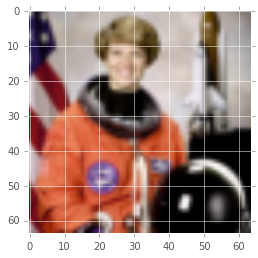

In [57]:
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64, 64))
plt.imshow(img)

Instead of using a network to go from some x position to the value of a sine wave, what we're going to do instead teach a network to go from the location on an image frame to a particular color.  So given any position in an image, the network will need to learn what color to paint.  Despite the seeming complexity of this task, it is remarkably similar to what we've just done.  Let's take a look.

In [58]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

What we're going to do is use regression to predict the value of a pixel given its (row, col) position.  So the input to our network is `X = (row, col)` value.  And the output of the network is `Y = (r, g, b)`.

We can get our original image back by reshaping the colors back into the original image shape:

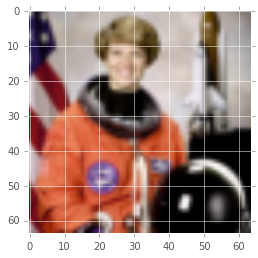

In [59]:
plt.imshow(ys.reshape(img.shape))

Remember before, we were using regression to input to our network `X = x`, and output `Y = y`.  The only thing that is changing here is the number of values in our input and output, and what they represent to us.  But Tensorflow can handle any number of values we give it, so this is actually a pretty simple modification to the network definition.  We'll stick with the convention of using the variable `X` to denote the input to the network, and `Y` to denote the output of the network.

In [82]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

<a name="building-the-network"></a>
## Building the Network

For our model, we'll make our first deep neural network!  Instead of having a single fully connected layer, we'll have many layers.  We'll make use of a for loop to simplify the creation of the network. The network will look like:

<TODO: wacom/motion-graphic>

In [83]:
n_neurons = [2, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

The rest of this code is pretty much the same as what we've done in previous networks.  We setup our cost.  Except before, we only ever had 1 feature.  In this network, our output is 3 vaules, `r`, `g`, `b`.

<a name="training"></a>
## Training

In order to better measure the error, we'll sum the error across all 3 values.  There are many ways we could have approached this which we'll get into in later sessions.

In [84]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

We're going to use a different type of optimizer called `AdamOptimizer` which in general will work better than the original `GradientDescentOptimizer`.  It's pretty similar, except it has some tricks to help with gradient descent.  Getting into the details of it is beyond the scope of what we have time for.  So long as you're not working with sequential data or building a recurrent network, it will probably always work better than just using GradientDescent.

In [85]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

The rest of the code is pretty much the same.  We create the optimizer exactly the same way, by giving it our cost.  And then create a session to iterate over chunks of our training data.  Every 20 iterations, we're going to draw the predicted image by evaluating the predicted image tensor, `Y_pred`, and giving it every location in the image to predict, the `xs` array.  This will return us the predicted color values for those locations.  This process will take awhile!

0 180.268
1 164.191
2 159.257
3 155.831
4 152.894
5 149.055
6 147.207
7 144.653
8 142.185
9 140.778
10 138.925
11 138.029
12 136.456
13 131.23
14 125.638
15 121.538
16 118.602
17 117.162
18 115.35
19 117.664


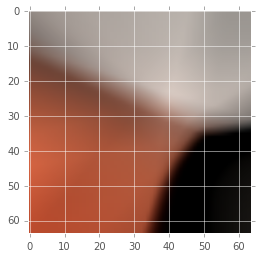

20 115.184
21 114.107
22 113.878
23 112.885
24 112.268
25 112.314
26 112.582
27 111.71
28 112.823
29 113.561
30 111.575
31 110.344
32 110.128
33 110.57
34 109.518
35 110.989
36 111.075
37 108.195
38 107.528
39 107.749


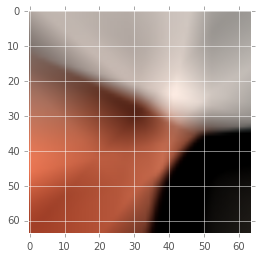

40 107.799
41 108.459
42 108.351
43 106.866
44 109.221
45 105.877
46 103.829
47 106.08
48 103.524
49 103.186
50 103.598
51 104.52
52 101.688
53 107.666
54 101.633
55 102.48
56 101.043
57 98.3041
58 98.7686
59 100.014


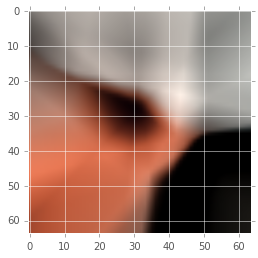

60 96.8776
61 97.1489
62 96.5956
63 98.2998
64 95.2187
65 94.826
66 97.5371
67 92.9862
68 93.22
69 93.9906
70 91.9571
71 97.7335
72 92.7471
73 90.619
74 90.6557
75 90.7412
76 93.469
77 90.0973
78 89.8805
79 90.3433


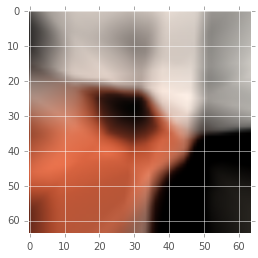

80 94.4161
81 90.3931
82 91.3092
83 89.521
84 89.507
85 89.8121
86 90.4525
87 86.9071
88 88.3857
89 87.2306
90 90.6804
91 86.1301
92 88.3321
93 86.7312
94 86.3179
95 86.2926
96 84.872
97 84.952
98 87.1415
99 86.3461


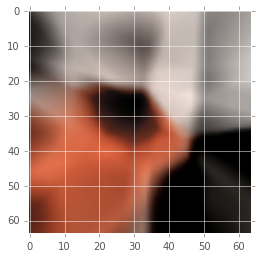

100 86.002
101 84.9384
102 89.4884
103 84.2337
104 84.8378
105 88.0244
106 83.418
107 82.9786
108 81.5693
109 83.2115
110 83.3661
111 85.5017
112 84.4012
113 83.7584
114 81.6084
115 82.0005
116 82.5201
117 81.6759
118 80.4931
119 79.4234


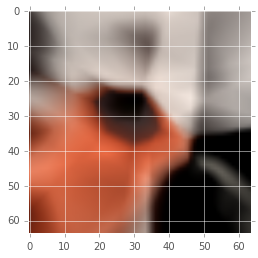

120 80.5799
121 84.1433
122 78.2515
123 79.5931
124 79.2909
125 79.7176
126 80.2888
127 79.5777
128 79.7933
129 78.7037
130 78.6721
131 79.2933
132 83.6601
133 76.5487
134 79.2047
135 77.1345
136 77.9282
137 76.4219
138 78.2937
139 82.4439


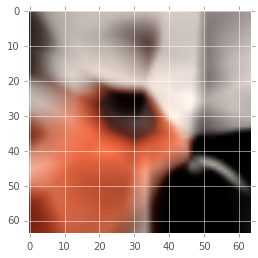

140 78.0778
141 75.412
142 82.266
143 76.9612
144 75.3944
145 77.1157
146 75.8615
147 76.7359
148 71.6241
149 75.2832
150 73.697
151 74.0513
152 72.3847
153 75.3946
154 70.9935
155 72.5179
156 71.7941
157 78.2016
158 74.6305
159 75.5307


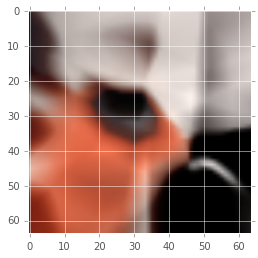

160 70.9155
161 71.6868
162 71.3272
163 76.8293
164 77.2593
165 73.266
166 72.8694
167 69.7303
168 73.0662
169 70.5092
170 72.9878
171 82.3772
172 71.1816
173 70.2142
174 69.2424
175 71.937
176 73.9994
177 67.6254
178 73.5431
179 70.2685


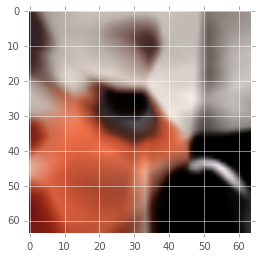

180 67.9453
181 70.3481
182 68.3116
183 68.39
184 69.4749
185 67.0465
186 68.6726
187 70.6982
188 66.3103
189 68.6433
190 63.7943
191 66.4817
192 66.0125
193 64.4976
194 70.6671
195 63.4562
196 64.7972
197 67.3802
198 64.513
199 67.7348


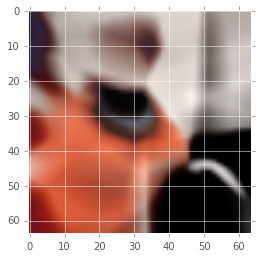

200 64.5804
201 64.9656
202 67.6514
203 69.3559
204 65.471
205 65.273
206 63.6176
207 66.1531
208 71.9704
209 64.5437
210 66.3995
211 69.162
212 61.8542
213 64.5507
214 64.5258
215 61.4573
216 64.8839
217 64.9896
218 61.9745
219 64.2368


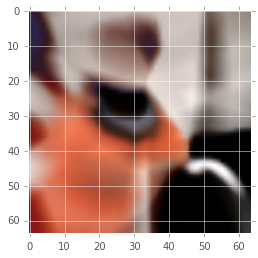

220 60.4566
221 59.7428
222 63.9604
223 65.2757
224 63.1721
225 60.1852
226 66.8092
227 63.8802
228 60.2232
229 59.9455
230 61.6833
231 70.0702
232 59.6132
233 61.7041
234 61.6297
235 59.3679
236 60.5204
237 62.4603
238 61.6543
239 60.3377


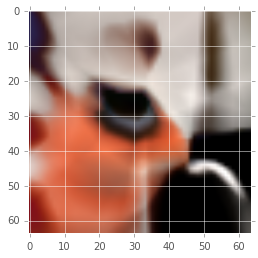

240 62.698
241 58.1151
242 62.7219
243 68.8218
244 62.6964
245 65.4286
246 63.2959
247 59.7449
248 59.5132
249 62.3275
250 56.2543
251 57.3634
252 57.7576
253 58.166
254 57.9537
255 61.0603
256 55.0126
257 57.2215
258 58.379
259 69.7759


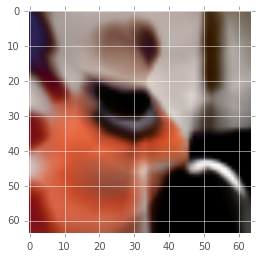

260 57.674
261 56.5793
262 56.8328
263 56.7943
264 54.4394
265 58.5745
266 57.5531
267 55.7146
268 57.9627
269 56.8271
270 58.6333
271 61.5163
272 59.8663
273 62.4755
274 59.6841
275 58.0179
276 57.2489
277 61.6896
278 58.6113
279 58.1618


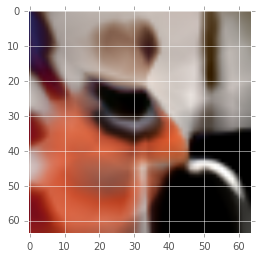

280 57.5832
281 59.5752
282 55.8029
283 59.3322
284 54.2133
285 54.9845
286 60.5239
287 53.752
288 53.2078
289 61.184
290 56.4753
291 56.4017
292 58.9835
293 52.8924
294 53.9423
295 60.5934
296 54.9096
297 55.0251
298 55.3332
299 59.0094


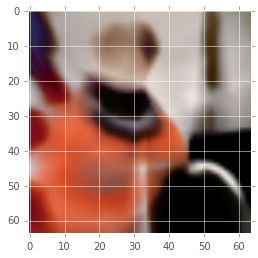

300 55.8674
301 57.4734
302 55.9898
303 51.5424
304 58.8503
305 56.0323
306 53.5245
307 54.7053
308 54.0532
309 55.2605
310 54.6856
311 53.4
312 54.5072
313 55.0773
314 54.1167
315 54.1137
316 53.8924
317 58.0744
318 57.1022
319 62.6139


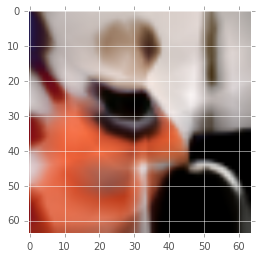

320 52.0909
321 53.868
322 56.7421
323 53.1956
324 55.4595
325 53.2359
326 51.3126
327 50.9756
328 55.03
329 50.9564
330 53.5665
331 53.525
332 51.3522
333 50.8479
334 50.8914
335 56.3988
336 56.9739
337 51.3179
338 58.0371
339 52.3303


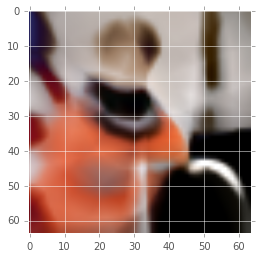

340 50.5992
341 53.2673
342 50.8386
343 57.1612
344 52.8178
345 51.0814
346 50.0269
347 54.2995
348 55.6708
349 51.4118
350 49.4718
351 52.1202
352 53.5731
353 51.8895
354 52.9998
355 53.6199
356 52.4947
357 51.5888
358 49.3358
359 53.7892


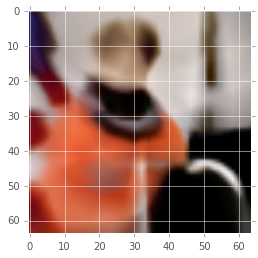

360 51.1472
361 49.4059
362 56.5184
363 58.191
364 51.2848
365 52.9481
366 51.2144
367 48.8824
368 48.8064
369 50.1169
370 53.9945
371 52.1057
372 51.0009
373 49.1341
374 57.3266
375 55.7197
376 50.9526
377 52.684
378 50.2015
379 50.0299


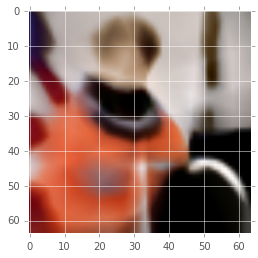

380 53.9478
381 51.1951
382 51.1137
383 51.0117
384 49.4018
385 50.0959
386 48.7336
387 48.3769
388 49.6624
389 50.9029
390 48.7366
391 54.5656
392 49.5775
393 51.199
394 50.1717
395 48.1232
396 47.9681
397 49.4309
398 54.2134
399 54.1871


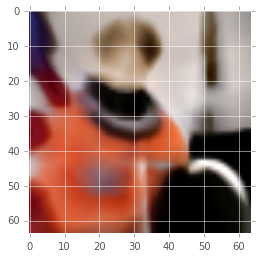

400 57.7091
401 48.8052
402 50.1004
403 52.2012
404 49.9858
405 48.5065
406 47.6488
407 48.8744
408 51.0764
409 52.2416
410 49.0656
411 51.1217
412 50.4043
413 52.5643
414 48.4092
415 51.7533
416 49.2195
417 60.0902
418 48.7895
419 50.2266


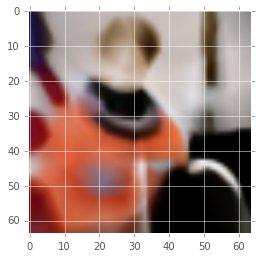

420 49.898
421 48.4538
422 53.0898
423 46.661
424 49.1565
425 56.3303
426 46.9292
427 48.4347
428 51.1677
429 46.6382
430 48.2089
431 49.1893
432 48.0323
433 46.2111
434 48.1323
435 51.9653
436 47.2792
437 48.9665
438 50.4664
439 51.8759


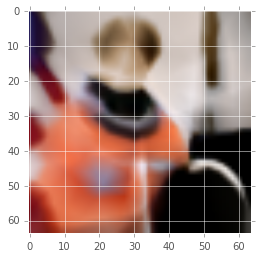

440 49.5115
441 50.684
442 49.4197
443 51.433
444 45.6323
445 46.7503
446 52.9704
447 47.7273
448 45.8881
449 52.5829
450 45.9042
451 48.715
452 50.0645
453 46.1503
454 47.3143
455 47.1895
456 46.7154
457 48.562
458 48.6534
459 47.1465


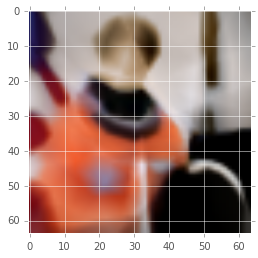

460 46.0219
461 49.4291
462 47.8159
463 48.2187
464 50.1638
465 49.4133
466 48.1334
467 50.5452
468 47.6581
469 45.8165
470 47.6951
471 44.8371
472 50.2898
473 47.9474
474 50.1521
475 46.1108
476 46.3824
477 45.7023
478 47.5251
479 49.3102


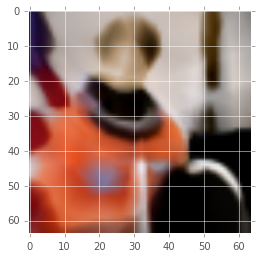

480 49.3534
481 50.0794
482 47.9323
483 46.4491
484 45.8564
485 46.3365
486 47.4543
487 52.0623
488 48.0635
489 47.3247
490 47.7039
491 45.8852
492 44.3039
493 44.5764
494 47.0999
495 44.5463
496 46.7516
497 46.1814
498 44.7972
499 45.5264


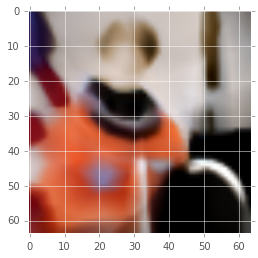

In [86]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.initialize_all_variables())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()

After letting this run for a few minutes, we'll see the image becoming more like the original image.

<a name="homework"></a>
# Homework:

Head over to the [notebook](session-2.ipynb) for more details.

<a name="reading"></a>
# Reading:

Cauchy, Augustin (1847). Méthode générale pour la résolution des systèmes d'équations simultanées. pp. 536–538.

H. Robinds and S. Monro, “A stochastic approximation method,” Annals of Mathematical Statistics, vol. 22, pp. 400–407, 1951. 

Sutton, R. S. (1986). Two problems with backpropagation and other steepest-descent learning procedures for networks. Proc. 8th Annual Conf. Cognitive Science Society. 

Yann Lecun. Efficient BackProp. 1998.
http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

Kingma, D. P., & Ba, J. L. (2015). Adam: a Method for Stochastic Optimization. International Conference on Learning Representations, 1–13.

J. Schmidhuber. Deep Learning in Neural Networks: An Overview. Neural Networks, 61, p 85-117, 2015.